**Корректность проверена на Python 3.7:**
+ pandas 0.23.0
+ numpy 1.14.5

In [2]:
from google.colab import drive
drive.mount('/content/drive')
%cd '/content/drive/MyDrive/Colab Notebooks/stepik/module4/confint'
%ls

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/Colab Notebooks/stepik/module4/confint
 banner_click_stat.txt   proportion.ipynb         water.ipynb
 bootstrap.ipynb        'two proportions.ipynb'   water.txt
 mean.ipynb              verizon.txt


# Доверительные интервалы на основе bootstrap

In [3]:
import numpy as np
import pandas as pd

In [4]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## Загрузка данных

### Время ремонта телекоммуникаций

Verizon — основная региональная телекоммуникационная компания (Incumbent Local Exchange Carrier, ILEC) в западной 
части США. В связи с этим данная компания обязана предоставлять сервис ремонта телекоммуникационного оборудования 
не только для своих клиентов, но и для клиентов других локальных телекоммуникационых компаний (Competing Local Exchange Carriers, CLEC). При этом в случаях, когда время ремонта оборудования для клиентов других компаний существенно выше, чем для собственных, Verizon может быть оштрафована. 

In [5]:
data = pd.read_csv('verizon.txt', sep='\t')
data.shape

(1687, 2)

In [6]:
data.head()

,Time,Group
0,17.50,ILEC
1,2.40,ILEC
2,0.00,ILEC
3,0.65,ILEC
4,22.23,ILEC


In [7]:
data.Group.value_counts()

ILEC    1664
CLEC      23
Name: Group, dtype: int64

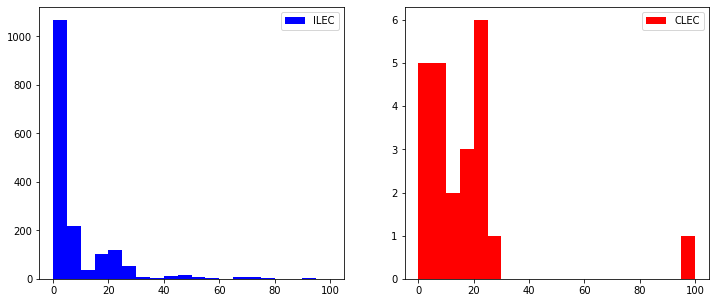

In [8]:
pylab.figure(figsize(12, 5))
pylab.subplot(1,2,1)
pylab.hist(data[data.Group == 'ILEC'].Time, bins = 20, color = 'b', range = (0, 100), label = 'ILEC')
pylab.legend()

pylab.subplot(1,2,2)
pylab.hist(data[data.Group == 'CLEC'].Time, bins = 20, color = 'r', range = (0, 100), label = 'CLEC')
pylab.legend()

pylab.show()

## Bootstrap

In [9]:
def get_bootstrap_samples(data, n_samples):
    indices = np.random.randint(0, len(data), (n_samples, len(data)))
    samples = data[indices]
    return samples

In [10]:
def stat_intervals(stat, alpha):
    boundaries = np.percentile(stat, [100 * alpha / 2., 100 * (1 - alpha / 2.)])
    return boundaries

### Интервальная оценка медианы

In [11]:
ilec_time = data[data.Group == 'ILEC'].Time.values
clec_time = data[data.Group == 'CLEC'].Time.values
print(len(ilec_time), len(clec_time))
print(get_bootstrap_samples(ilec_time, 1000).shape)
print(ilec_time.shape)

1664 23
(1000, 1664)
(1664,)


In [18]:
np.random.seed(0)
ilec_median_scores = np.median(get_bootstrap_samples(ilec_time, 1000), axis=1)
clec_median_scores = np.median(get_bootstrap_samples(clec_time, 1000), axis=1)
delta_median_scores = clec_median_scores - ilec_median_scores
print("95% confidence interval for the ILEC median repair time:",  stat_intervals(ilec_median_scores, 0.05))
print("95% confidence interval for the CLEC median repair time:",  stat_intervals(clec_median_scores, 0.05))
print("95% confidence interval for the CLEC median repair time:",  stat_intervals(delta_median_scores, 0.05))

95% confidence interval for the ILEC median repair time: [3.18    3.82525]
95% confidence interval for the CLEC median repair time: [ 5.79125 20.     ]
95% confidence interval for the CLEC median repair time: [ 2.04975 16.63   ]


In [12]:
np.random.seed(0)

ilec_median_scores = list(map(np.median, get_bootstrap_samples(ilec_time, 1000)))
print(len(ilec_median_scores))
clec_median_scores = list(map(np.median, get_bootstrap_samples(clec_time, 1000)))

print("95% confidence interval for the ILEC median repair time:",  stat_intervals(ilec_median_scores, 0.05))
print("95% confidence interval for the CLEC median repair time:",  stat_intervals(clec_median_scores, 0.05))

1000
95% confidence interval for the ILEC median repair time: [3.18    3.82525]
95% confidence interval for the CLEC median repair time: [ 5.79125 20.     ]


### Точечная оценка разности медиан

In [ ]:
print("difference between medians:", np.median(clec_time) - np.median(ilec_time))

difference between medians: 10.74


### Интервальная оценка разности медиан

In [ ]:
delta_median_scores = list(map(lambda x: x[1] - x[0], zip(ilec_median_scores, clec_median_scores)))

In [ ]:
print("95% confidence interval for the difference between medians",  stat_intervals(delta_median_scores, 0.05))

95% confidence interval for the difference between medians [ 2.04975 16.63   ]


In [ ]:
В пятилетнем рандомизированном исследовании Гарвардской медицинской школы 11037 испытуемых через 
день принимали аспирин, а ещё 11034 — плацебо. 
Исследование было слепым, то есть, испытуемые не знали, что именно они принимают.
За 5 лет инфаркт случился у 104 испытуемых, принимавших аспирин, и у 189 принимавших плацебо.

In [ ]:
def get_odds(data):
    p = np.sum(data) / len(data)
    return p / (1 - p)

In [ ]:
np.random.seed(0)
n_samples = 1000
data_placebo = np.zeros(11034)
data_placebo[:189] = 1
data_aspirin = np.zeros(11037)
data_aspirin[:104] = 1
odds_placebo = np.fromiter(map(get_odds, get_bootstrap_samples(data_placebo, n_samples)), dtype=float)
odds_aspirin = np.fromiter(map(get_odds, get_bootstrap_samples(data_aspirin, n_samples)), dtype=float)
odds_ratio = odds_placebo / odds_aspirin
print(np.min(odds_ratio), np.max(odds_ratio))
stat_intervals(odds_ratio, 0.05)

1.3071904007489568 2.640992350214172


array([1.46286276, 2.35093673])

In [ ]:
odds_placebo.shape

(1000,)